In [1]:
import os
import re
import pickle
import unicodedata
import pandas as pd
import networkx as nx

In [2]:
# Load the graph from the pickle file
with open('flight_network_graph.pickle', 'rb') as f:
   G = pickle.load(f)

In [3]:
df = pd.read_csv('worldcities2.csv')
print(df)

                   city        city_ascii      lat       lng  \
0                 Tokyo             Tokyo  35.6897  139.6922   
1               Jakarta           Jakarta  -6.1750  106.8275   
2                 Delhi             Delhi  28.6100   77.2300   
3             Guangzhou         Guangzhou  23.1300  113.2600   
4                Mumbai            Mumbai  19.0761   72.8775   
...                 ...               ...      ...       ...   
47863        Munha-dong        Munha-dong  39.3813  127.2517   
47864            Sil-li            Sil-li  39.4880  125.4640   
47865              Muan              Muan  34.9897  126.4714   
47866         Hongseong         Hongseong  36.6009  126.6650   
47867  Charlotte Amalie  Charlotte Amalie  18.3420  -64.9331   

                   country iso2 iso3      admin_name  capital  population  \
0                    Japan   JP  JPN           Tōkyō  primary  37732000.0   
1                Indonesia   ID  IDN         Jakarta  primary  33756000.0   


In [4]:
# Function to normalize city names
def normalize_city_name(city_name):
    # Replace common abbreviations like 'St' with 'Saint'
    city_name = re.sub(r'\bSt\b', 'Saint', city_name, flags=re.IGNORECASE)

    # Remove hyphens and other non-alphanumeric characters
    city_name = re.sub(r'[^a-zA-Z0-9]', '', city_name)

    # Remove accents and convert to lowercase
    city_name = unicodedata.normalize('NFKD', city_name).encode('ASCII', 'ignore').decode('ASCII')

    # Convert to lowercase to ensure case-insensitivity
    city_name = city_name.lower()

    return city_name

# Function to add population as integers to the graph
def add_population_to_graph(graph, city_df):
    # Ensure the DataFrame has no missing values in the matching column
    city_df = city_df[~city_df['city_ascii'].isnull()]

    # Normalize the graph node names (ensure the city names in the graph are also standardized)
    normalized_nodes = {normalize_city_name(node): node for node in graph.nodes}

    # Iterate through the DataFrame
    for _, row in city_df.iterrows():
        city = row['city_ascii']
        population = row['population']

        # Normalize the city name
        normalized_city = normalize_city_name(city)

        # Convert population to integer if it is not null
        if not pd.isnull(population):
            population = int(population)

        # Check if the normalized city name exists in the graph nodes
        if normalized_city in normalized_nodes:
            # Add population as a node attribute
            nx.set_node_attributes(graph, {normalized_nodes[normalized_city]: {'population': population}})

    return graph

# Assuming G is your graph and df is your DataFrame
G = add_population_to_graph(G, df)

# Verify the updated graph
for node, data in G.nodes(data=True):
    print(f"Node: {node}, Data: {data}")

Node: Sochi, Data: {'coords': (39.9566, 43.449902), 'population': 411524}
Node: Kazan, Data: {'coords': (49.27870178, 55.60620117), 'population': 1259173}
Node: Dushanbe, Data: {'coords': (68.82499695, 38.54330063), 'population': 863400}
Node: Chisinau, Data: {'coords': (28.93099976, 46.92770004), 'population': 702300}
Node: Minsk 2, Data: {'coords': (28.03070068, 53.88249969)}
Node: Tashkent, Data: {'coords': (69.28119659, 41.25790024), 'population': 2956384}
Node: Trabzon, Data: {'coords': (39.78969955, 40.99509811), 'population': 758237}
Node: Yerevan, Data: {'coords': (44.46500015, 40.12210083), 'population': 1075800}
Node: Krasnodar, Data: {'coords': (39.17050171, 45.03469849), 'population': 948827}
Node: Moscow, Data: {'coords': (37.4146, 55.972599), 'population': 25616}
Node: Istanbul, Data: {'coords': (28.8146, 40.976898), 'population': 16079000}
Node: St. Petersburg, Data: {'coords': (30.26250076, 59.8003006), 'population': 259343}
Node: Omsk, Data: {'coords': (73.3105011, 54.

In [5]:
# List of nodes without population data
missing_population_nodes = [node for node, data in G.nodes(data=True) if data.get('population') in (None, 0)]

# Print number of nodes without population data
print(f"Number of nodes without population data: {len(missing_population_nodes)}")

Number of nodes without population data: 1062


In [6]:
# Function to check which cities have corresponding files in the new_cities folder
def check_missing_nodes_in_new_cities(missing_population_nodes, city_files_path):
    # List to store cities that have corresponding files
    cities_with_files = []

    # Loop through each city in missing_population_nodes
    for city in missing_population_nodes:
        # Normalize city name (e.g., 'New York' -> 'NewYork')
        normalized_city = normalize_city_name(city)

        # Create the filename for the city (e.g., 'London.txt', 'NewYork.txt')
        filename = f"{normalized_city}.txt"
        file_path = os.path.join(city_files_path, filename)

        # Check if the file exists
        if os.path.exists(file_path):
            cities_with_files.append(city)
        else:
            print(f"File for {city} not found.")

    print(f"\nCities with corresponding files in '{city_files_path}':")
    for city in cities_with_files:
        print(f"- {city}")

    return cities_with_files

# Path to the folder where the city-specific text files are stored
city_files_path = 'MyDrive/new_cities'

# Check which cities have corresponding files in the new_cities folder
cities_with_files = check_missing_nodes_in_new_cities(missing_population_nodes, city_files_path)

File for Minsk 2 not found.
File for Khudzhand not found.
File for Fergana not found.
File for Alma-ata not found.
File for Mineralnye Vody not found.
File for Aktau not found.
File for Tel-aviv not found.
File for Mirnyj not found.
File for Yakutia not found.
File for Kurgan Tyube not found.
File for Tselinograd not found.
File for Kiev not found.
File for Chimkent not found.
File for Hurghada not found.
File for Novy Urengoy not found.
File for Navoi not found.
File for Beloyarsky not found.
File for Aktyubinsk not found.
File for Kerkyra/corfu not found.
File for Heraklion not found.
File for Rhodos not found.
File for Duesseldorf not found.
File for Algier not found.
File for Milano not found.
File for Enfidha not found.
File for Kulyab not found.
File for Bourgas not found.
File for Andizhan not found.
File for Termez not found.
File for Urgench not found.
File for Palma de Mallorca not found.
File for Zaporozhye not found.
File for Ulan Bator not found.
File for Tallinn-ulemiste 

In [7]:
# Remove the nodes with missing population data
G.remove_nodes_from(missing_population_nodes)

print(f"Number of nodes after removal: {len(G.nodes)}")

Number of nodes after removal: 2067




---



In [8]:
"""import os

# Function to normalize city names (e.g., 'New York' -> 'NewYork')
def normalize_city_name(city_name):
    # Replace common abbreviations like 'St' with 'Saint'
    city_name = re.sub(r'\bSt\b', 'Saint', city_name, flags=re.IGNORECASE)

    # Remove hyphens and other non-alphanumeric characters
    city_name = re.sub(r'[^a-zA-Z0-9]', '', city_name)

    # Remove accents and convert to lowercase
    city_name = unicodedata.normalize('NFKD', city_name).encode('ASCII', 'ignore').decode('ASCII')

    # Convert to lowercase to ensure case-insensitivity
    city_name = city_name.lower()

    return city_name

# Function to check how many cities in 'nodes_with_population' are in the 'history' folder
def compare_nodes_with_history(nodes_with_population, history_folder_path):
    # Normalize city names (e.g., 'New York' -> 'NewYork') for comparison with the filenames
    normalized_nodes = {normalize_city_name(node) for node in nodes_with_population}

    # Get a list of filenames in the 'history' folder (e.g., 'London.txt', 'Paris.txt')
    history_files = [os.path.splitext(filename)[0] for filename in os.listdir(history_folder_path) if filename.endswith('.txt')]

    # Normalize the history files as well
    normalized_history_files = {normalize_city_name(filename) for filename in history_files}

    # Check which cities from 'nodes_with_population' have a corresponding file in 'history'
    cities_with_history_files = normalized_nodes.intersection(normalized_history_files)
    cities_without_history_files = normalized_nodes.difference(normalized_history_files)

    # Print the results
    print(f"Number of cities with population data: {len(nodes_with_population)}")
    print(f"Cities with a corresponding file in the history folder: {len(cities_with_history_files)}")
    print(f"Cities without a corresponding file in the history folder: {len(cities_without_history_files)}")

    # Optionally, print the cities
    print("\nCities with a corresponding file in history:")
    for city in cities_with_history_files:
        print(city)

    print("\nCities without a corresponding file in history:")
    for city in cities_without_history_files:
        print(city)

history_folder_path = 'history'

# Assuming nodes_with_population is already populated (list of cities with population data)
# Compare the nodes with population data to the history folder files
compare_nodes_with_history(nodes_with_population, history_folder_path)

G_text = G.copy()

# List to store nodes to remove
nodes_to_remove = []

# Identify nodes that do not have history
for node in G_text.nodes():
    file_path = f'history/{node}.txt'
    if not os.path.exists(file_path):
        nodes_to_remove.append(node)

# Remove nodes that do not have history
G_text.remove_nodes_from(nodes_to_remove)"""

'import os\n\n# Function to normalize city names (e.g., \'New York\' -> \'NewYork\')\ndef normalize_city_name(city_name):\n    # Replace common abbreviations like \'St\' with \'Saint\'\n    city_name = re.sub(r\'\x08St\x08\', \'Saint\', city_name, flags=re.IGNORECASE)\n    \n    # Remove hyphens and other non-alphanumeric characters\n    city_name = re.sub(r\'[^a-zA-Z0-9]\', \'\', city_name)\n    \n    # Remove accents and convert to lowercase\n    city_name = unicodedata.normalize(\'NFKD\', city_name).encode(\'ASCII\', \'ignore\').decode(\'ASCII\')\n    \n    # Convert to lowercase to ensure case-insensitivity\n    city_name = city_name.lower()\n    \n    return city_name\n\n# Function to check how many cities in \'nodes_with_population\' are in the \'history\' folder\ndef compare_nodes_with_history(nodes_with_population, history_folder_path):\n    # Normalize city names (e.g., \'New York\' -> \'NewYork\') for comparison with the filenames\n    normalized_nodes = {normalize_city_name(

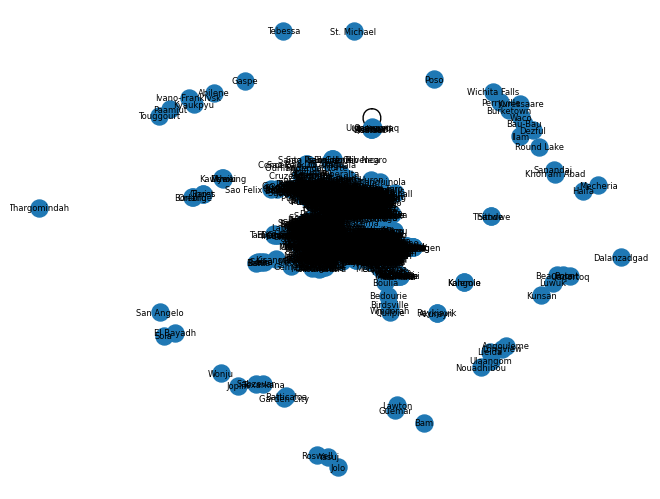

In [9]:
!pip install fa2_modified
from fa2_modified import ForceAtlas2
import matplotlib.pyplot as plt

pos = ForceAtlas2(verbose=False).forceatlas2_networkx_layout(G, pos=None, iterations=50)

nx.draw(G, pos, with_labels=True, node_size=150, font_size=6)
plt.show()

In [10]:
# degree centrality
degree_centrality = nx.degree_centrality(G)
max_degree_centrality = max(degree_centrality, key=degree_centrality.get)
print(f"The node {max_degree_centrality} is connected to {degree_centrality[max_degree_centrality]*100} of all other nodes")

The node London is connected to 14.036786060019363 of all other nodes


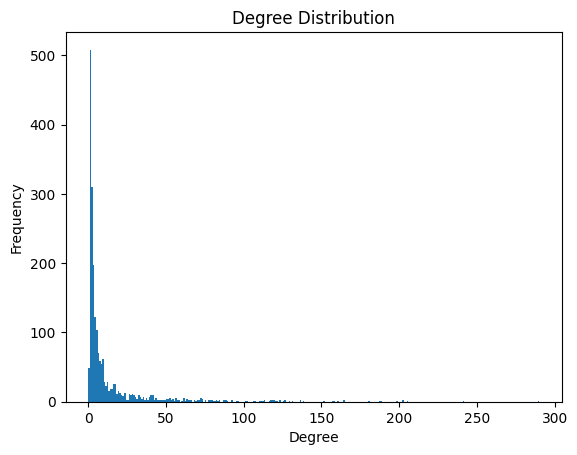

In [11]:
# degree distribution
degrees = [val for (node, val) in G.degree()]
plt.hist(degrees, bins=range(min(degrees), max(degrees)+1, 1))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()